In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

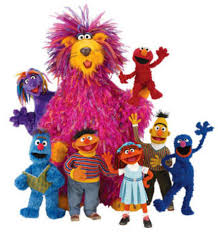

In [2]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('download.jpeg')
cv2_imshow(img)

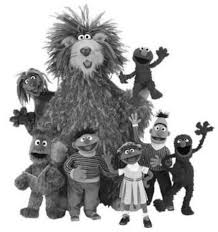

In [55]:
img=cv2.imread('download.jpeg',0)
cv2_imshow(img)


In [12]:
kernel=np.ones((5,5),np.uint8)
eroded=cv2.erode(img,kernel,iterations=1)
dilated=cv2.dilate(img,kernel,iterations=1)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

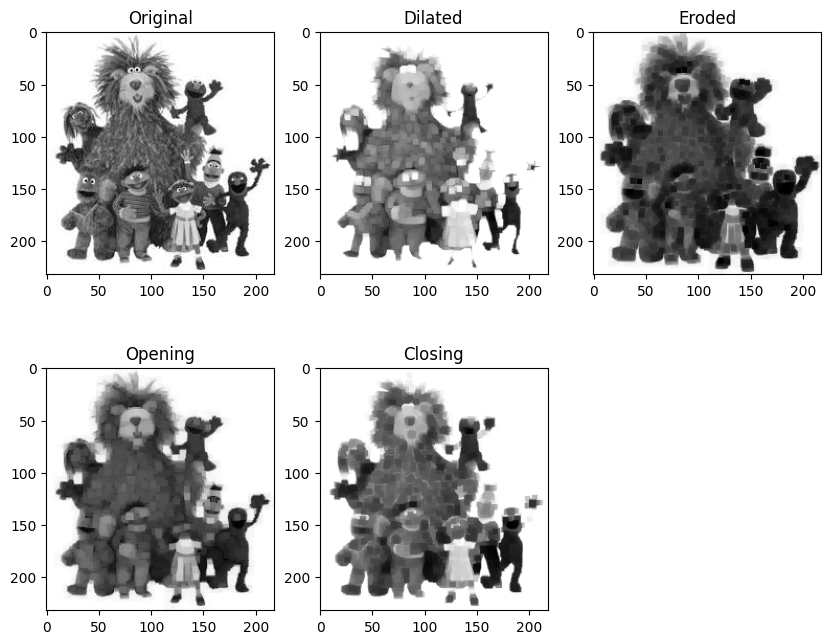

In [13]:
plt.figure(figsize=(10,8));
plt.subplot(231),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.subplot(232),plt.imshow(dilated,cmap='gray'),plt.title('Dilated')
plt.subplot(233),plt.imshow(eroded,cmap='gray'),plt.title('Eroded')
plt.subplot(234),plt.imshow(opening,cmap='gray'),plt.title('Opening')
plt.subplot(235),plt.imshow(closing,cmap='gray'),plt.title('Closing')
plt.show();

In [14]:
_, otsu_thresh=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


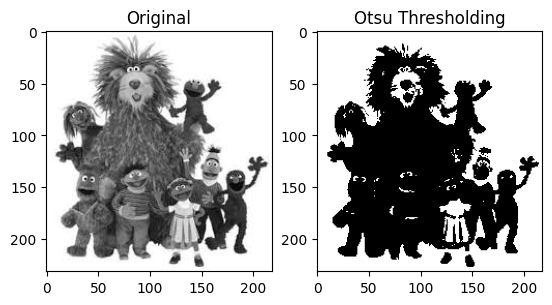

In [15]:
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(otsu_thresh,cmap='gray'),plt.title('Otsu Thresholding')
plt.show();

In [16]:
adaptive_thresh=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

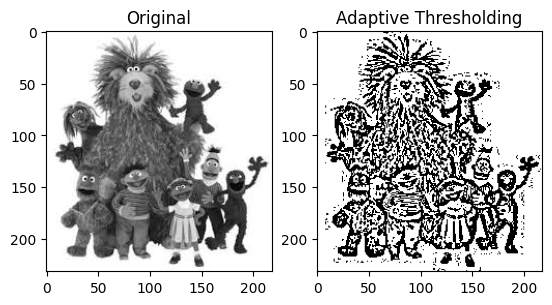

In [17]:
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(adaptive_thresh,cmap='gray'),plt.title('Adaptive Thresholding')
plt.show();

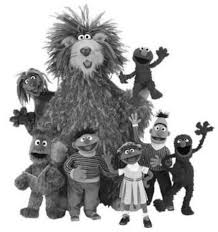

In [38]:
_, thresh=cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
cv2_imshow(img)

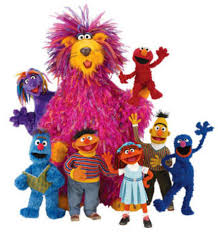

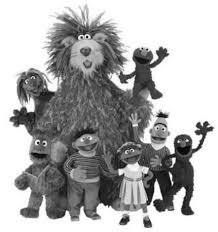

In [39]:
img2=cv2.imread('download.jpeg')
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2_imshow(img2)
cv2_imshow(gray2)

In [40]:
_, thresh2=cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)


In [41]:
kernel2=np.ones((3,3),np.uint8)
opening2=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel2,iterations=2)


In [42]:
sure_bg=cv2.dilate(opening2,kernel2,iterations=3)
dist_transform=cv2.distanceTransform(opening2,cv2.DIST_L2,5)
_, sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)

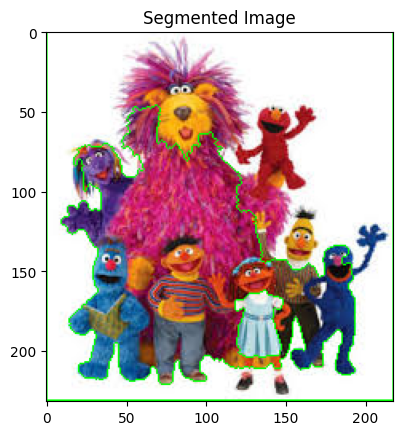

In [54]:
_, markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
markers=cv2.watershed(img2,markers)
img2[markers==-1]=[0,255,0]
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.show();